# JAX Example for Interpolation

In [1]:
import jax.numpy as jnp
from jax import vmap

import matplotlib.pyplot as plt

from jax_geometry.manifolds import nSphere
from jax_geometry.prob_geodesics import ProbGEORCE, ProbGEORCE_Embedded, ProbGEORCE_Euclidean


## Defining manifold and funcitons

### Define manifold

In [2]:
#Simple Euclidean example
M = nSphere(dim=2)
z0 = -jnp.ones(2, dtype=jnp.float32)
zN = jnp.ones(2, dtype=jnp.float32)

### Regularization function

In [3]:
#error to a unit circle
def reg_fun(x):

    return jnp.sum((jnp.sum(x**2, axis=-1)-1.0)**2)
    

### Projection function

In [4]:
#dummy projection function
def proj_fun(x):

    return x
    

## Computing geodesics

### ProbGEORCE

In [5]:
ProbGeodesic = ProbGEORCE(M=M,
                          reg_fun=reg_fun,
                          init_fun=None,
                          lam=1.0,
                          N=100,
                          tol=1e-4,
                          max_iter=1000,
                          line_search_params = {'rho': 0.5},
                         )

In [6]:
curve = ProbGeodesic(z0,zN)

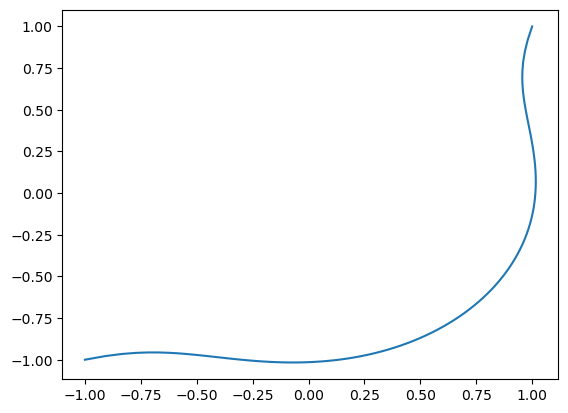

In [7]:
plt.plot(curve[:,0], curve[:,1])

### ProbGEORCE Euclidean

In [8]:
ProbGeodesic = ProbGEORCE_Euclidean(reg_fun=reg_fun,
                                    init_fun=None,
                                    lam=1.0,
                                    N=100,
                                    tol=1e-4,
                                    max_iter=1000,
                                    line_search_params = {'rho': 0.5},
                                   )

In [9]:
curve = ProbGeodesic(z0,zN)

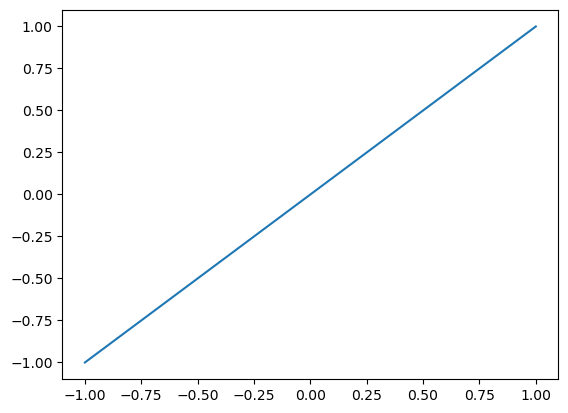

In [10]:
plt.plot(curve[:,0], curve[:,1])

### ProbGEORCE Embedded

In [11]:
def metric_matrix(x):

    if x.ndim == 1:
        return M.G(x)
    else:
        return vmap(M.G)(x)

ProbGeodesic = ProbGEORCE_Embedded(metric_matrix=metric_matrix,
                                   reg_fun=reg_fun,
                                   proj_fun=proj_fun,
                                   init_fun=None,
                                   lam1=1.0,
                                   lam2=0.0,
                                   N=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {'rho': 0.5},
                                  )

In [12]:
curve = ProbGeodesic(z0,zN)

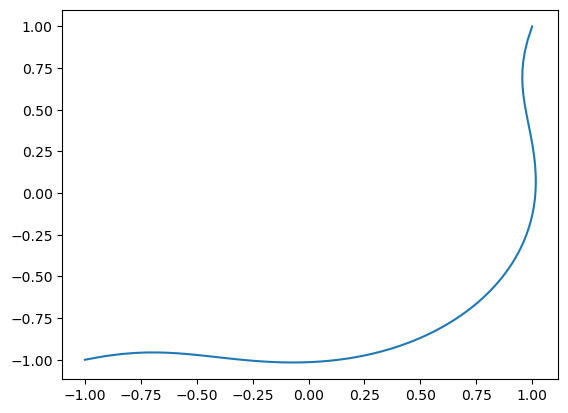

In [13]:
plt.plot(curve[:,0], curve[:,1])